<a href="https://colab.research.google.com/github/mbravoar/hello-world/blob/main/Gaussian_Long_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Dataset for Fracture and Impact Toughness of High-Entropy Alloys_v3_modified.xlsx to Dataset for Fracture and Impact Toughness of High-Entropy Alloys_v3_modified.xlsx


In [2]:
import numpy as np
import pandas as pd
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.model_selection import train_test_split

# Standard ML Models for comparison
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

# Matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib
matplotlib.rcParams['font.size'] = 16
matplotlib.rcParams['figure.figsize'] = (9, 9)

In [3]:
# Load a specific sheet from an Excel file
file_path = "Dataset for Fracture and Impact Toughness of High-Entropy Alloys_v3_modified.xlsx"  # Change to your actual file path
sheet_name = "Fracture toughness"  # Replace with the sheet name you want to load

df = pd.read_excel(file_path, sheet_name=sheet_name)
df = df.drop(columns=['ID','Reference','Publication date','JQ (kJ/m2)','KQ (MPa·m1/2)','Composition from the references','Composition (at. %)','JIC (kJ/m2)','Uniform (plastic) elongation (%)'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Material condition       153 non-null    object 
 1   Processing history       153 non-null    object 
 2   Phase                    150 non-null    object 
 3   Grain size (um)          59 non-null     object 
 4   Density (g/cm3)          24 non-null     float64
 5   Hardness (HV)            76 non-null     object 
 6   Hardness (GPa)           21 non-null     object 
 7   Youngs modulus  (GPa)    45 non-null     object 
 8   Tensile YS (MPa)         27 non-null     object 
 9   UTS (MPa)                24 non-null     object 
 10  Final elongation (%)     26 non-null     object 
 11  Testing temperature (K)  153 non-null    int64  
 12  Test type (K or J)       150 non-null    object 
 13  Standard followed        67 non-null     object 
 14  Sample geomtry           1

In [4]:
import re

def extract_number(value):
    value = str(value)
    if pd.isnull(value) or value == "":
        return float('nan')
    else:
        # Modified regex to handle hyphens and potential spaces around them
        match = re.search(r'([\d.]+)\s*[-–]\s*([\d.]+)?', value)
        if match:
            # If range found, return the first number (lower bound) as float
            return float(match.group(1))
        else:
            # If no range, try to convert to float as before
            try:
                return float(re.split(r'±|\+/-', value)[0])
            except ValueError:
                # Handle cases that still can't be converted
                return float('nan')
# List of columns to process
columns_to_process = ['Grain size (um)', 'Density (g/cm3)','Hardness (HV)','Hardness (GPa)','Youngs modulus  (GPa)','Tensile YS (MPa)','UTS (MPa)','Final elongation (%)','KIC (MPa·m1/2)']

# Apply the function to each column
for column in columns_to_process:
    df[column] = df[column].apply(extract_number)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Material condition       153 non-null    object 
 1   Processing history       153 non-null    object 
 2   Phase                    150 non-null    object 
 3   Grain size (um)          57 non-null     float64
 4   Density (g/cm3)          24 non-null     float64
 5   Hardness (HV)            65 non-null     float64
 6   Hardness (GPa)           21 non-null     float64
 7   Youngs modulus  (GPa)    32 non-null     float64
 8   Tensile YS (MPa)         27 non-null     float64
 9   UTS (MPa)                24 non-null     float64
 10  Final elongation (%)     21 non-null     float64
 11  Testing temperature (K)  153 non-null    int64  
 12  Test type (K or J)       150 non-null    object 
 13  Standard followed        67 non-null     object 
 14  Sample geomtry           1

In [5]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# List of categorical columns to encode
categorical_columns = ['Material condition', 'Processing history','Phase','Test type (K or J)','Standard followed','Sample geomtry','Sample size (mm)','Notch geometry (mm)']

# Initialize LabelEncoder
label_encoders = {}  # Store encoders for later use

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])  # Encode and replace original column
    label_encoders[col] = le  # Save encoder for inverse transformation if needed

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Material condition       153 non-null    int64  
 1   Processing history       153 non-null    int64  
 2   Phase                    153 non-null    int64  
 3   Grain size (um)          57 non-null     float64
 4   Density (g/cm3)          24 non-null     float64
 5   Hardness (HV)            65 non-null     float64
 6   Hardness (GPa)           21 non-null     float64
 7   Youngs modulus  (GPa)    32 non-null     float64
 8   Tensile YS (MPa)         27 non-null     float64
 9   UTS (MPa)                24 non-null     float64
 10  Final elongation (%)     21 non-null     float64
 11  Testing temperature (K)  153 non-null    int64  
 12  Test type (K or J)       153 non-null    int64  
 13  Standard followed        153 non-null    int64  
 14  Sample geomtry           1

In [6]:
# List of columns to apply mode imputation
columns_to_impute = ['Grain size (um)', 'Density (g/cm3)','Hardness (HV)','Hardness (GPa)','Youngs modulus  (GPa)','Tensile YS (MPa)','UTS (MPa)','Final elongation (%)','KIC (MPa·m1/2)']

# Apply mode imputation to each column
for column in columns_to_impute:
    df[column] = df[column].fillna(df[column].mode()[0])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Material condition       153 non-null    int64  
 1   Processing history       153 non-null    int64  
 2   Phase                    153 non-null    int64  
 3   Grain size (um)          153 non-null    float64
 4   Density (g/cm3)          153 non-null    float64
 5   Hardness (HV)            153 non-null    float64
 6   Hardness (GPa)           153 non-null    float64
 7   Youngs modulus  (GPa)    153 non-null    float64
 8   Tensile YS (MPa)         153 non-null    float64
 9   UTS (MPa)                153 non-null    float64
 10  Final elongation (%)     153 non-null    float64
 11  Testing temperature (K)  153 non-null    int64  
 12  Test type (K or J)       153 non-null    int64  
 13  Standard followed        153 non-null    int64  
 14  Sample geomtry           1

In [7]:
# Rename variables in train and teste
df = df.rename(columns={'Material condition': 'Mat_Cond',
                                  'Processing history': 'Process_his',
                                  'Grain size (um)': 'Grain_size',
                                  'Density (g/cm3)': 'Density',
                                  'Hardness (HV)': 'Hardness',
                                  'Hardness (GPa)': 'Hardness_GPa',
                                  'Youngs modulus  (GPa)': 'Youngs_mod',
                                  'Tensile YS (MPa)': 'Tensile_YS',
                                  'UTS (MPa)': 'UTS',
                                  'Final elongation (%)': 'Final_elong',
                                  'Test type (K or J)': 'Test_type',
                                  'Standard followed': 'Standard_follow',
                                  'Sample geomtry': 'Sample_geom',
                                  'Sample size (mm)': 'Sample_size',
                                  'Notch geometry (mm)': 'Notch_geom',
                                  'Testing temperature (K)':'Test_Temp',
                                  'KIC (MPa·m1/2)':'KIC'})

In [14]:
# Split into training/testing sets with 25% split
X_train, X_test, y_train, y_test = train_test_split(df, df['KIC'], test_size=0.25, random_state=42)

In [15]:
print(X_train.shape)
print(X_test.shape)

(114, 18)
(39, 18)


In [18]:
# Evaluate several ml models by training on training set and testing on testing set
def evaluate(X_train, X_test, y_train, y_test):
    # Names of models
    model_name_list = ['Linear Regression', 'ElasticNet Regression',
                      'Random Forest', 'Extra Trees', 'SVM',
                       'Gradient Boosted', 'Baseline']
    X_train = X_train.drop(columns='KIC')
    X_test = X_test.drop(columns='KIC')

    # Instantiate the models
    model1 = LinearRegression()
    model2 = ElasticNet(alpha=1.0, l1_ratio=0.5)
    model3 = RandomForestRegressor(n_estimators=50)
    model4 = ExtraTreesRegressor(n_estimators=50)
    model5 = SVR(kernel='rbf', degree=3, C=1.0, gamma='auto')
    model6 = GradientBoostingRegressor(n_estimators=20)

    # Dataframe for results
    results = pd.DataFrame(columns=['mae', 'rmse'], index = model_name_list)

    # Train and predict with each model
    for i, model in enumerate([model1, model2, model3, model4, model5, model6]):
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)

        # Metrics
        mae = np.mean(abs(predictions - y_test))
        rmse = np.sqrt(np.mean((predictions - y_test) ** 2))

        # Insert results into the dataframe
        model_name = model_name_list[i]
        results.loc[model_name, :] = [mae, rmse]

    # Median Value Baseline Metrics
    baseline = np.median(y_train)
    baseline_mae = np.mean(abs(baseline - y_test))
    baseline_rmse = np.sqrt(np.mean((baseline - y_test) ** 2))

    results.loc['Baseline', :] = [baseline_mae, baseline_rmse]

    return results

In [19]:
results = evaluate(X_train, X_test, y_train, y_test)

In [20]:
results

,mae,rmse
Linear Regression,37.109066,56.940239
ElasticNet Regression,34.693051,56.99929
Random Forest,22.120115,47.93592
Extra Trees,19.306105,42.399312
SVM,29.68984,71.731728
Gradient Boosted,26.518643,56.058672
Baseline,30.332564,71.939098


In [26]:
print(X_train.shape)
print(X_test.shape)

(114, 17)
(39, 17)


In [29]:
kernel=C(1.0,(1e-3,1e3)) *RBF([1.0]*17,(1e-2,1e2))

In [30]:
gp=GaussianProcessRegressor(kernel=kernel,n_restarts_optimizer=10)
gp.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/_gpr.py:660: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 1 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 2 of parameter k2__length_scale is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ga

GaussianProcessRegressor(kernel=1**2 * RBF(length_scale=[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
                         n_restarts_optimizer=10)

In [31]:
y_pred, sigma=gp.predict(X_test, return_std=True)

In [32]:
print(f"Predicted KIC: {y_pred[0]:.2f} MPa")
print(f"Uncertainty: {sigma[0]:.2f} MPa")

Predicted KIC: 8.73 MPa
Uncertainty: 0.33 MPa


In [33]:
# Calculate mae and rmse
def evaluate_predictions(predictions, true):
    mae = np.mean(abs(predictions - true))
    rmse = np.sqrt(np.mean((predictions - true) ** 2))

    return mae, rmse

In [34]:
# Display the naive baseline metrics
gauss_mae, gauss_rmse = evaluate_predictions(y_pred, y_test)
print('Gaussian Regression  MAE: {:.4f}'.format(gauss_mae))
print('Gaussian Regression  RMSE: {:.4f}'.format(gauss_rmse))

Gaussian Regression  MAE: 35.5335
Gaussian Regression  RMSE: 76.4774


In [35]:
# Add the results to the comparison dataframe
results.loc['Gaussian Regression', :] = [gauss_mae, gauss_rmse]

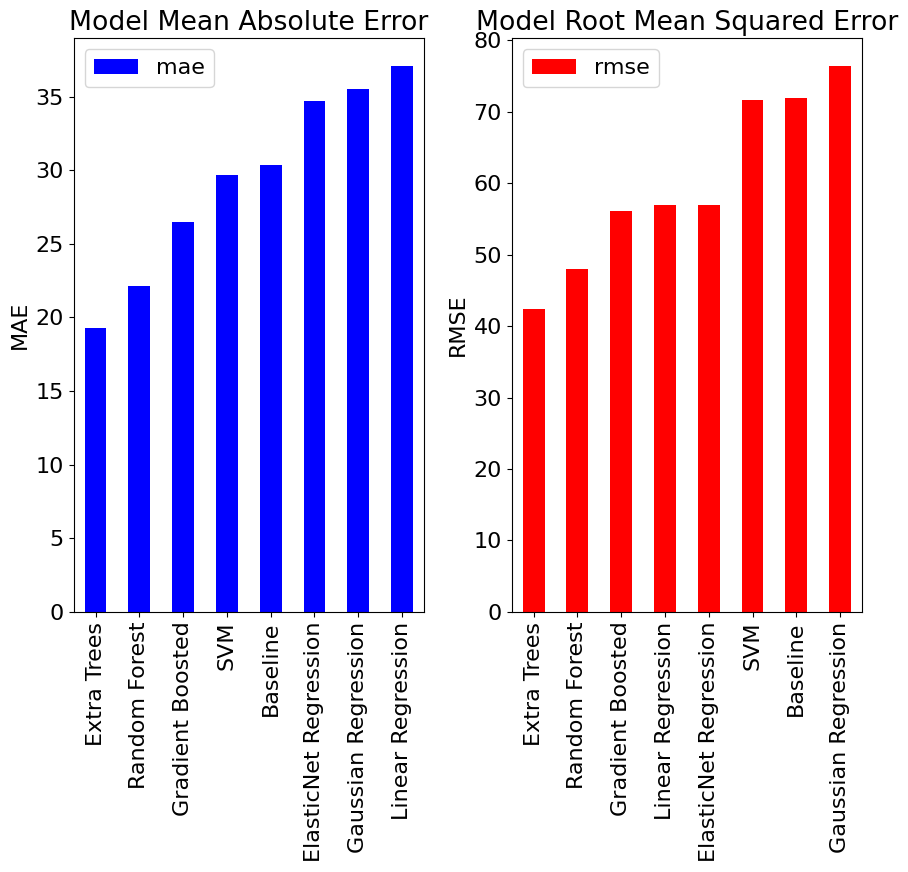

In [36]:
#figsize(12, 8)
matplotlib.rcParams['font.size'] = 16
# Root mean squared error
ax =  plt.subplot(1, 2, 1)
results.sort_values('mae', ascending = True).plot.bar(y = 'mae', color = 'b', ax = ax)
plt.title('Model Mean Absolute Error'); plt.ylabel('MAE');

# Median absolute percentage error
ax = plt.subplot(1, 2, 2)
results.sort_values('rmse', ascending = True).plot.bar(y = 'rmse', color = 'r', ax = ax)
plt.title('Model Root Mean Squared Error'); plt.ylabel('RMSE');

plt.tight_layout()